# CUSINE DATA ANALSIS

### loading the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### loading data set

In [2]:
data=pd.read_csv('Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### data set informations 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
data.shape

(200, 15)

### CHECKING THE NULL VALUES

In [6]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [7]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

### DROPPING UNWANTED COLUMNS

In [8]:
data.drop(columns=('User ID'),inplace=True)
data.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [9]:
data.drop(columns=('Area code'),inplace=True)
data.head()

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### CREATING NEW COLUMN  'AGE' FROM YOB COLUMN

In [10]:
data['Age']=[(2022-YOB)for YOB in data['YOB']]
data.head()

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


In [11]:
data.drop(columns=('YOB'),inplace=True)

In [12]:
data.head()

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


In [13]:
data.columns

Index(['Location', 'Gender', 'Marital Status', 'Activity', 'Budget',
       'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating', 'Service Rating',
       'Overall Rating', 'Often A S', 'Age'],
      dtype='object')

### RENAMING THE COLUMN ALCOHOL

In [14]:
data.rename(columns={'Alcohol ':'Alcohol'},inplace=True)
data.head()

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


### UNIVARIATE ANALYSIS

#### HISTOGRAM WITH KDE PLOT

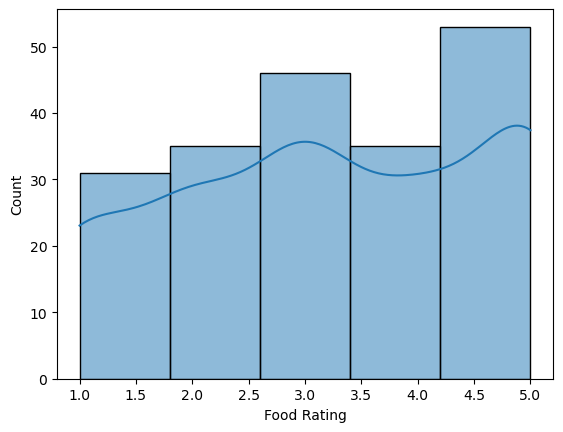

In [15]:
sns.histplot(data=data,x='Food Rating',bins=5,kde=True);
plt.show()

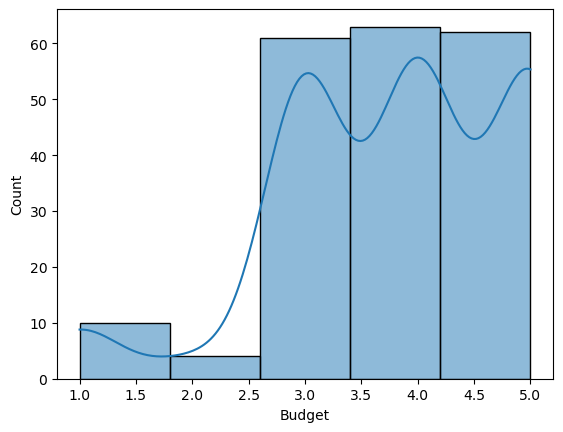

In [16]:
sns.histplot(data=data,x='Budget',bins=5,kde=True);
plt.show()

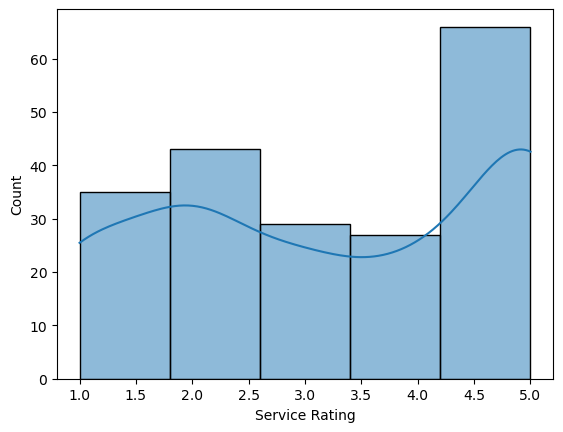

In [17]:
sns.histplot(data=data,x='Service Rating',bins=5,kde=True);
plt.show()

#### CREATING SUBPLOTS WITH BOXPLOT

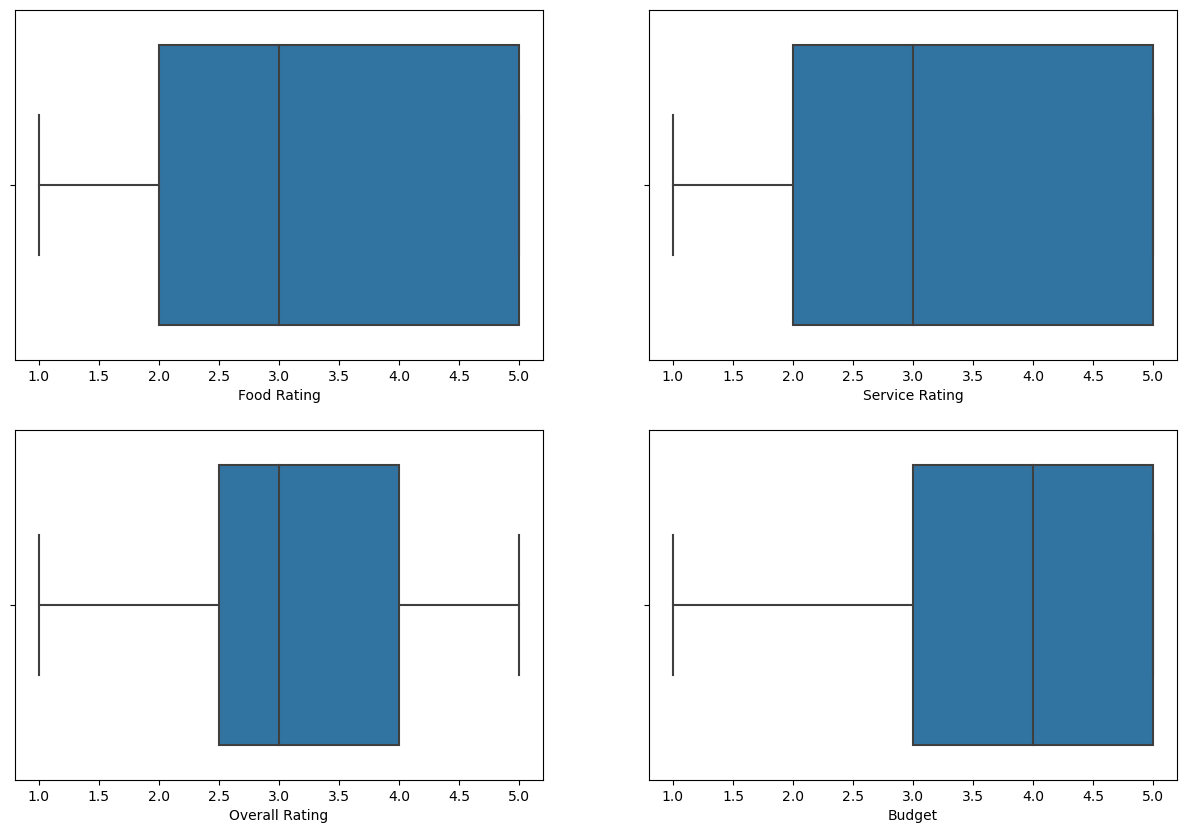

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='Food Rating');

plt.subplot(2,2,2)
sns.boxplot(data=data,x='Service Rating');

plt.subplot(2,2,3)
sns.boxplot(data=data,x='Overall Rating');

plt.subplot(2,2,4)
sns.boxplot(data=data,x='Budget');

## MULTIVARIATE ANALYSIS

#### COUNTPLOTS 

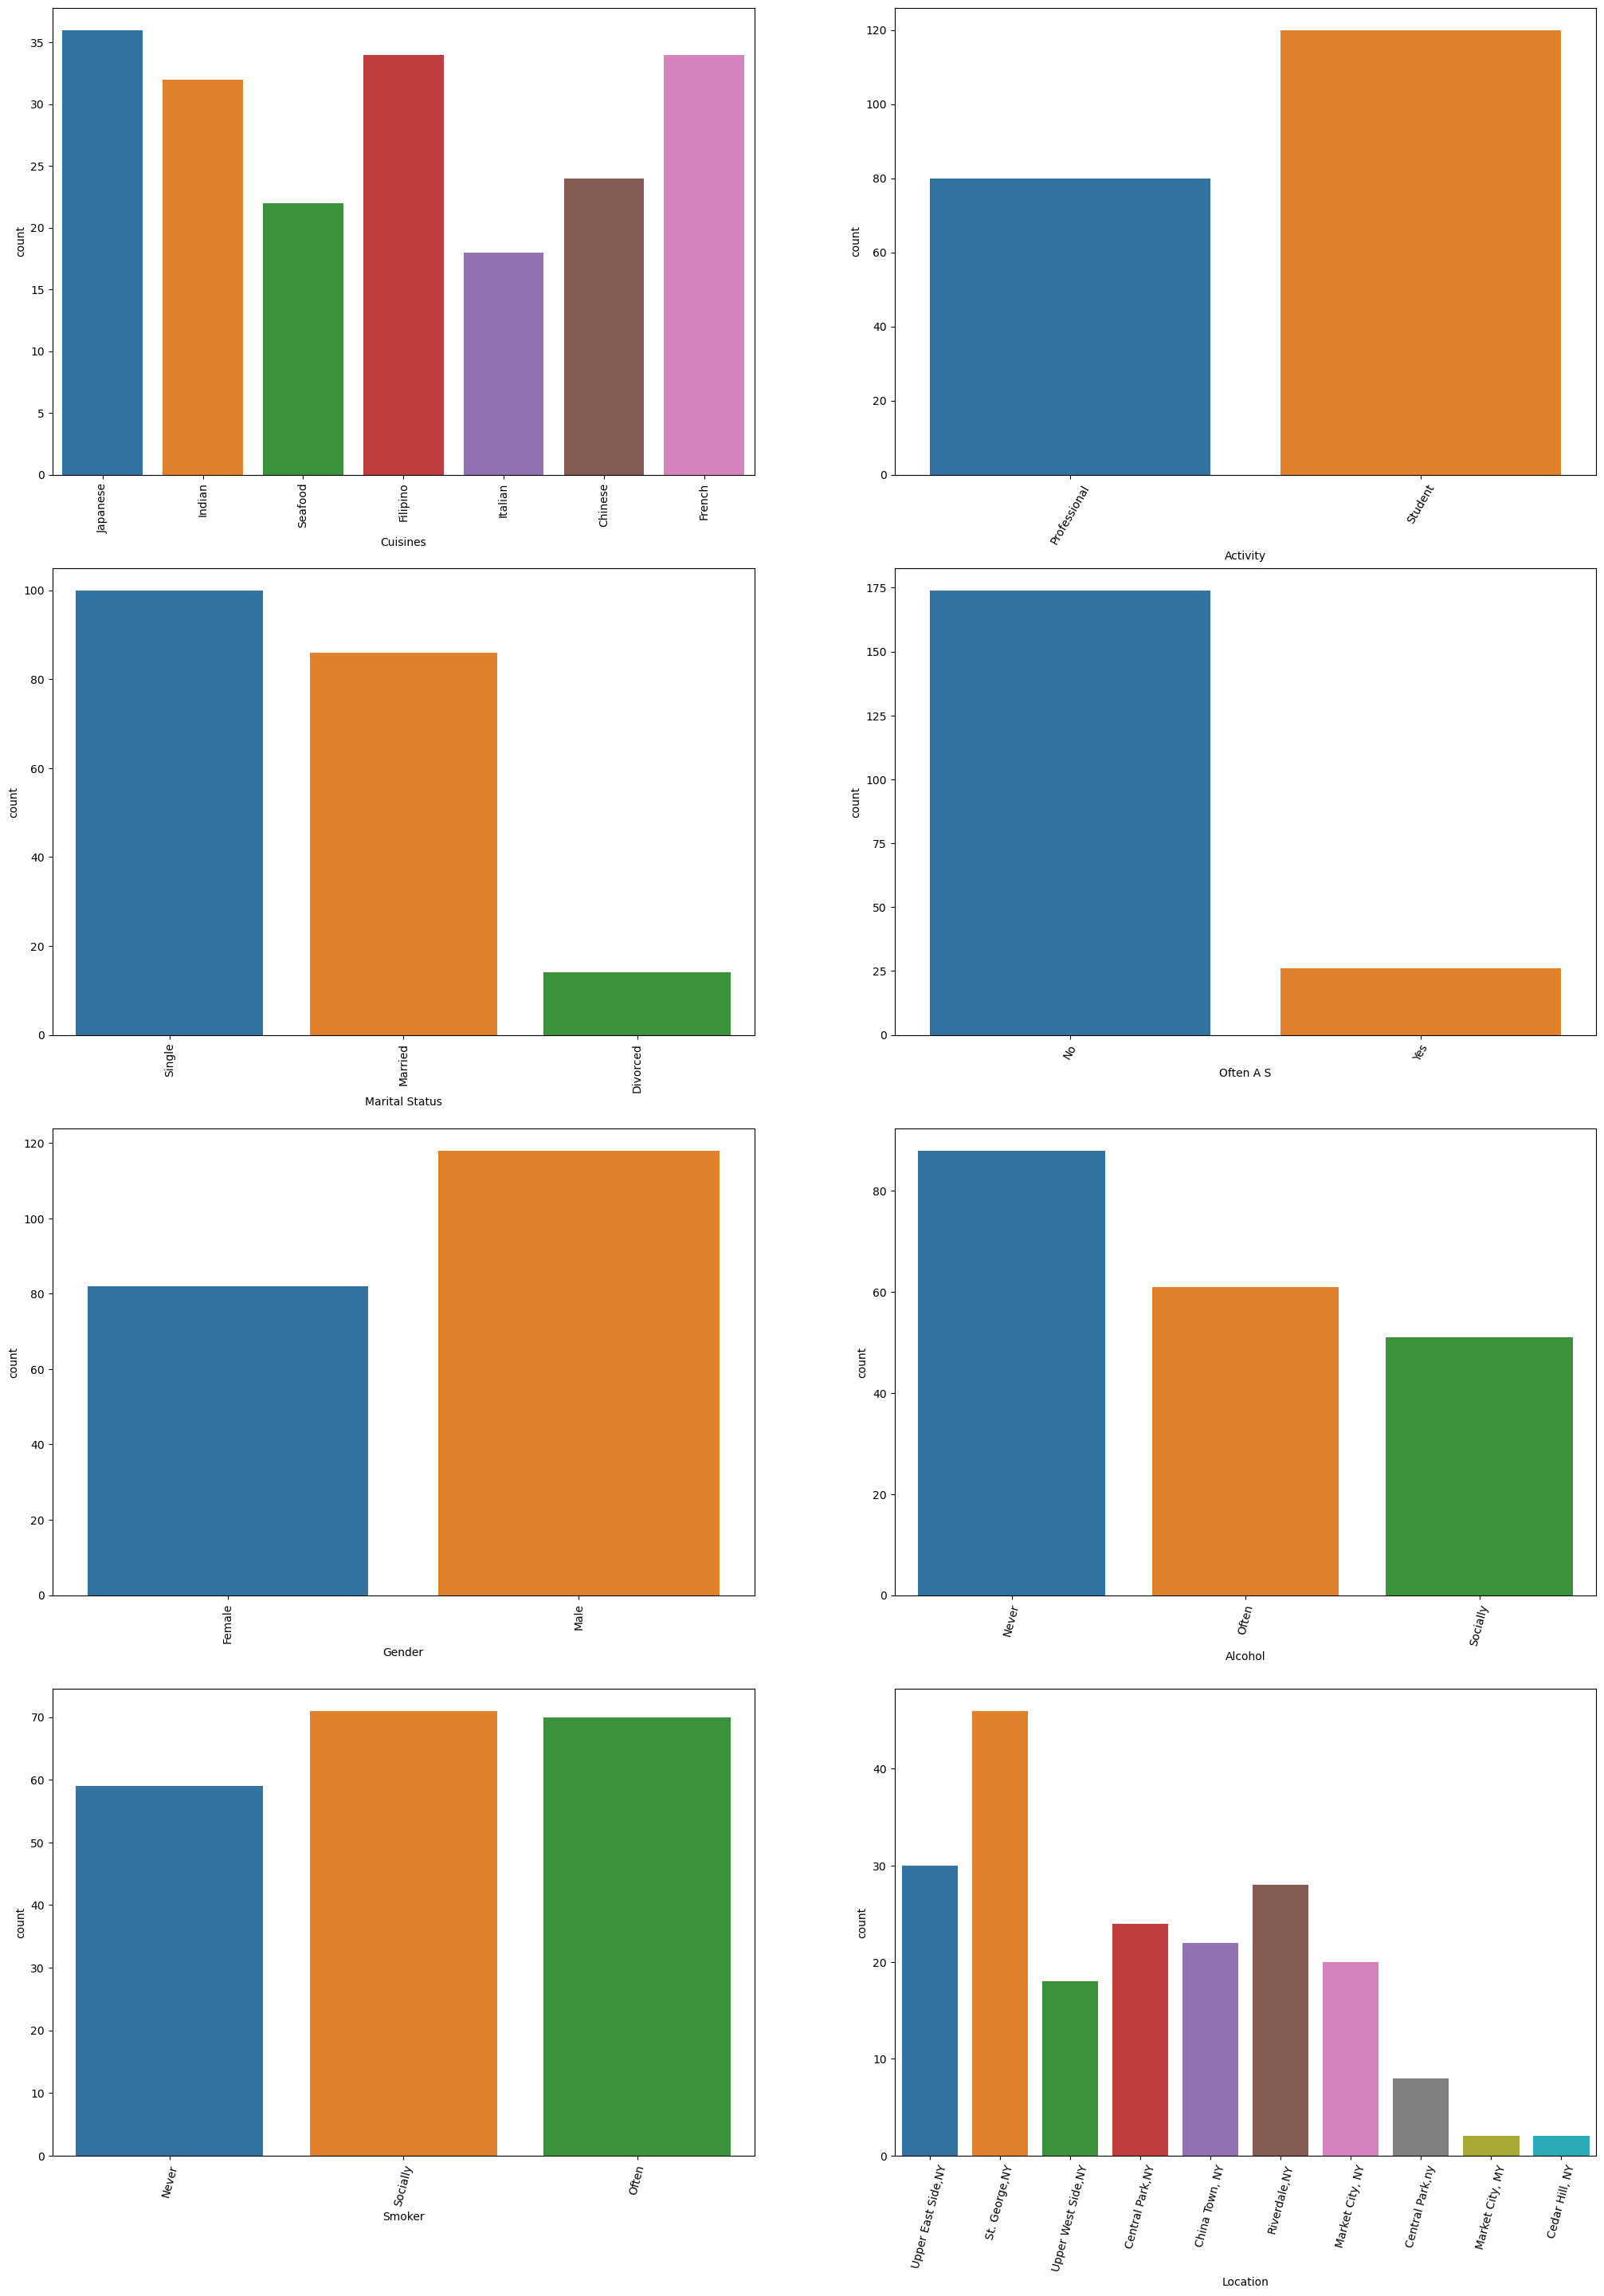

In [58]:
plt.figure(figsize=(25,35))
plt.subplot(4,2,1)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Cuisines');

plt.subplot(4,2,2)
plt.xticks(rotation=60)
sns.countplot(data=data,x='Activity');

plt.subplot(4,2,3)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Marital Status');

plt.subplot(4,2,4)
plt.xticks(rotation=60)
sns.countplot(data=data,x='Often A S');

plt.subplot(4,2,5)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Gender');

plt.subplot(4,2,6)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Alcohol');

plt.subplot(4,2,7)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Smoker');

plt.subplot(4,2,8)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Location');


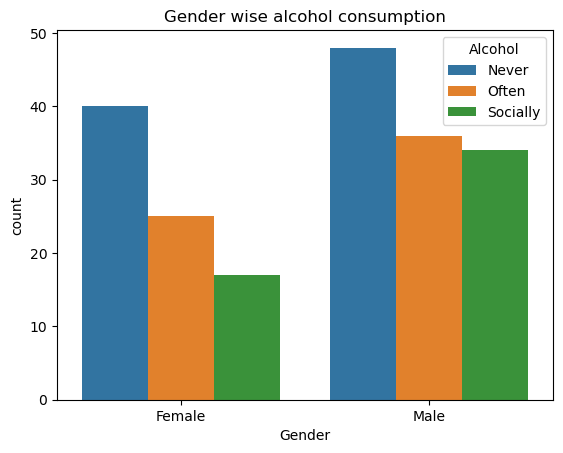

In [59]:
plt.title('Gender wise alcohol consumption')
sns.countplot(data=data,x='Gender',hue='Alcohol');
plt.show()

#### from the data set we can say that the least alchohol consumption is by males compared with females but socially men are more alchoholic compared to women.

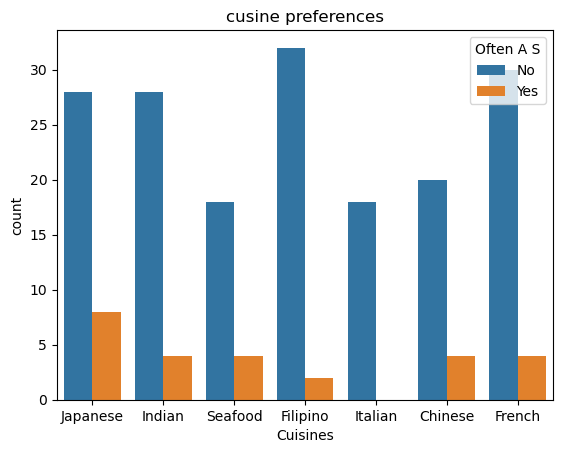

In [60]:
plt.title('cusine preferences')
sns.countplot(data=data,x='Cuisines',hue='Often A S');
plt.show()

#### this graphs says that most favorite cusine is japanese

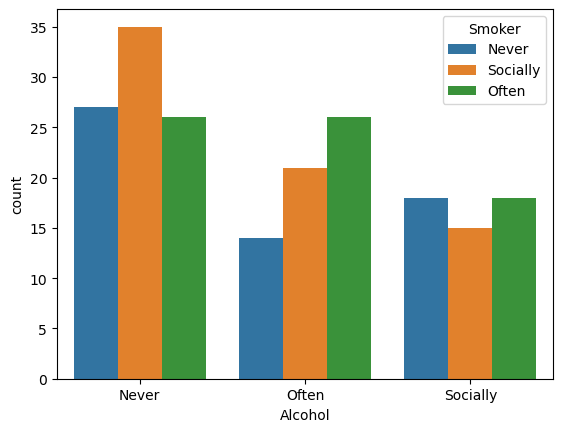

In [22]:
sns.countplot(data=data,x='Alcohol',hue='Smoker');

#### this graph says that most alchohol users are smokers too.

## creating a function to sort the column 'location'

In [23]:
def sort_location(location):
    data_location=data[data.Location==location]
    data_location.drop(columns='Location',inplace=True)
    return data_location

#### considering the dataset of the location central park only

In [24]:
Central_Park_ny =sort_location("Central Park,ny")
Central_Park_ny

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
24,Male,Single,Professional,3,Indian,Socially,Socially,2,5,3.5,No,59
33,Female,Single,Professional,5,Indian,Socially,Socially,1,5,3.0,No,13
46,Male,Single,Professional,3,French,Often,Socially,5,3,4.0,No,46
57,Male,Married,Professional,3,Filipino,Never,Never,3,4,3.5,No,60
124,Male,Single,Professional,3,Indian,Socially,Socially,3,5,4.0,No,59
133,Female,Single,Professional,5,Indian,Socially,Socially,3,5,4.0,No,13
146,Male,Single,Professional,3,French,Often,Socially,5,3,4.0,No,46
157,Male,Married,Professional,3,Filipino,Never,Never,3,4,3.5,No,60


#### plotting central park details:

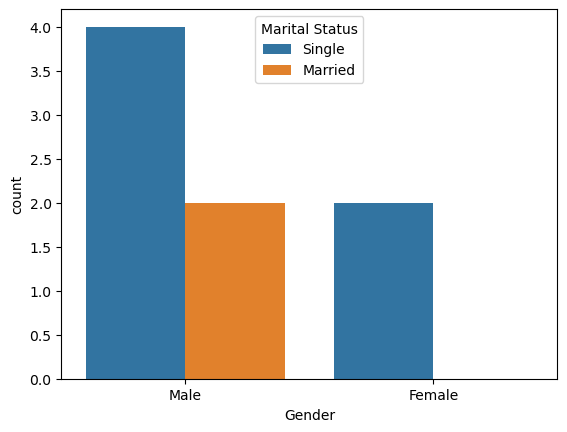

In [25]:
sns.countplot(data=Central_Park_ny,x='Gender',hue='Marital Status');

#### this graph says that there is no females in central park who are married

#### considering the dataset of the location st_George only

In [26]:
St_George_NY=sort_location("St. George,NY")
St_George_NY

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


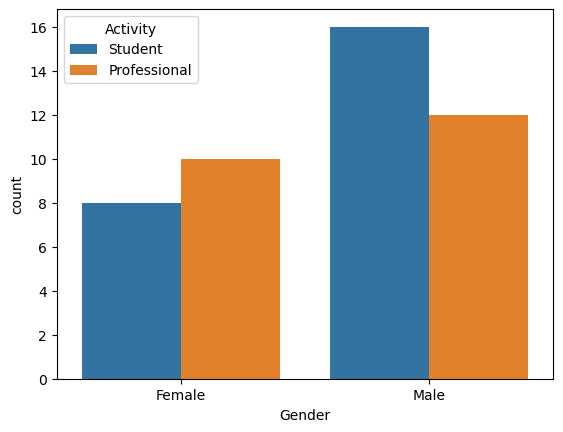

In [27]:
sns.countplot(data=St_George_NY,x='Gender',hue='Activity');

#### graph says that there are more males and most of them are students at st_George location  

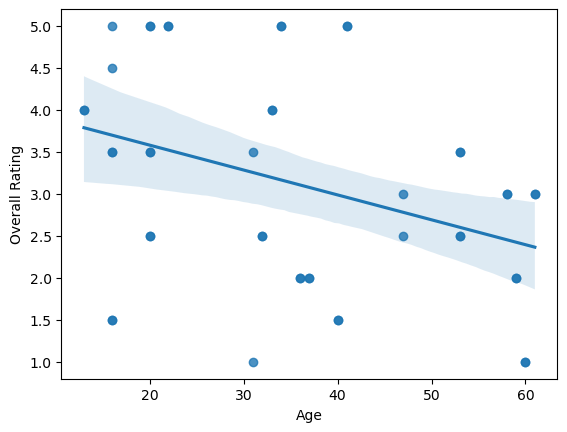

In [48]:
sns.regplot(data=St_George_NY,x='Age',y='Overall Rating')
plt.show()

#### there is a negative correlation  between age and overall rating in data set of St_George_NY

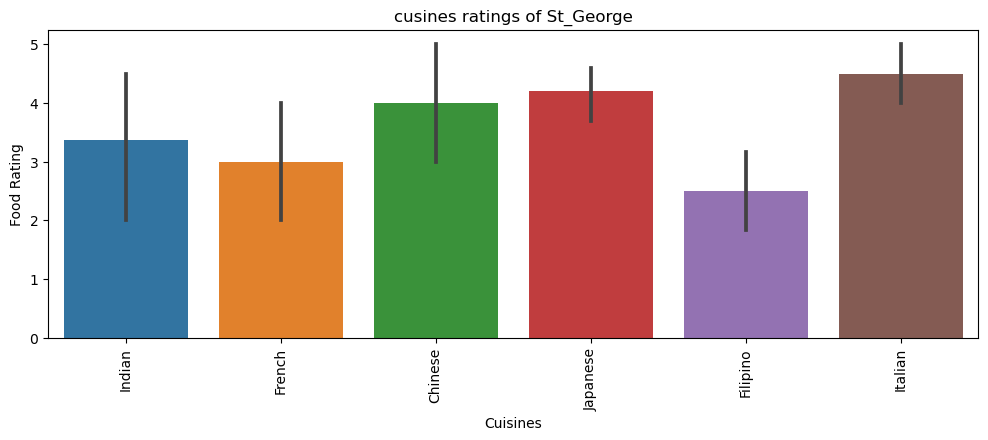

In [54]:
plt.figure(figsize=(12,4))
plt.xticks(rotation = 90)
plt.title('cusines ratings of St_George' )
sns.barplot(data=St_George_NY, x='Cuisines', y='Food Rating')
plt.show()

#### most people of st_George prefer italian cusines.

### DATASET WITH RESPECT TO AGE GROUP

In [30]:
data["Age_group"] = pd.cut(data.Age, bins=[0,10,18,35,75], labels=['Child', 'Teen', 'Middle', 'Old'])

In [31]:
data.head(10)

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age_group
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16,Teen
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31,Middle
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45,Old
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66,Old
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25,Middle
5,"China Town, NY",Male,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27,Middle
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45,Old
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19,Middle
8,"Riverdale,NY",Male,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57,Old
9,"Central Park,NY",Male,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27,Middle


In [32]:
data.value_counts('Age_group')

Age_group
Old       98
Middle    74
Teen      28
Child      0
dtype: int64

In [33]:
def sort_age(age):
    data_age=data[data.Age_group==age]
    data_age.drop(columns='Age_group',inplace=True)
    return data_age

#### data set of people above age 35

In [34]:
Old_=sort_age('Old')
Old_

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
8,"Riverdale,NY",Male,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
10,"St. George,NY",Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,"Cedar Hill, NY",Male,Married,Professional,4,Indian,Socially,Socially,2,5,3.5,No,62
191,"China Town, NY",Male,Divorced,Professional,3,French,Never,Often,3,1,2.0,No,53
193,"Riverdale,NY",Female,Married,Student,5,Filipino,Often,Never,1,4,2.5,No,37
194,"China Town, NY",Male,Married,Student,3,Indian,Often,Often,2,5,3.5,Yes,48


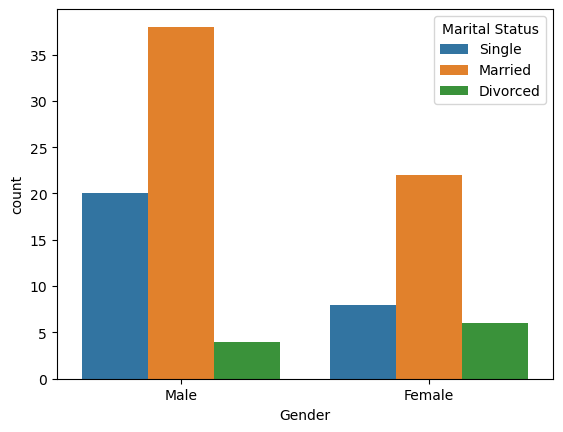

In [35]:
sns.countplot(data=Old_,x='Gender',hue='Marital Status');

#### of people above 35,most male's are married

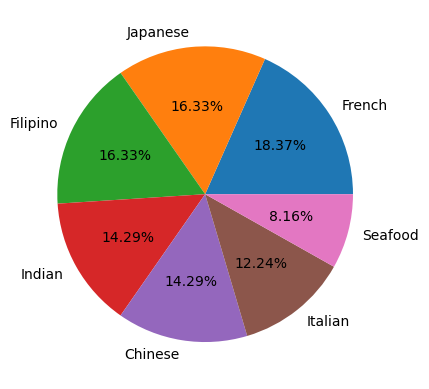

In [36]:
plt.pie(data=Old_,x=Old_.Cuisines .value_counts(),explode=[0,0,0,0,0,0,0],labels=['French', 'Japanese', 'Filipino', 'Indian', 'Chinese', 'Italian','Seafood'] , autopct='%0.2f%%');

## teens data set

In [37]:
Teen=sort_age('Teen')  
Teen

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
12,"St. George,NY",Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
16,"Riverdale,NY",Male,Single,Student,5,Seafood,Socially,Never,2,1,1.5,No,15
17,"Upper East Side,NY",Male,Single,Student,3,Japanese,Often,Often,1,5,3.0,Yes,18
20,"St. George,NY",Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
33,"Central Park,ny",Female,Single,Professional,5,Indian,Socially,Socially,1,5,3.0,No,13
36,"Market City, NY",Male,Single,Student,4,Japanese,Often,Often,5,2,3.5,Yes,16
50,"Riverdale,NY",Female,Single,Student,4,Japanese,Often,Often,5,5,5.0,Yes,15
51,"Upper East Side,NY",Female,Single,Student,3,Chinese,Often,Socially,3,2,2.5,No,17
66,"China Town, NY",Male,Single,Student,3,Seafood,Socially,Never,3,3,3.0,No,13


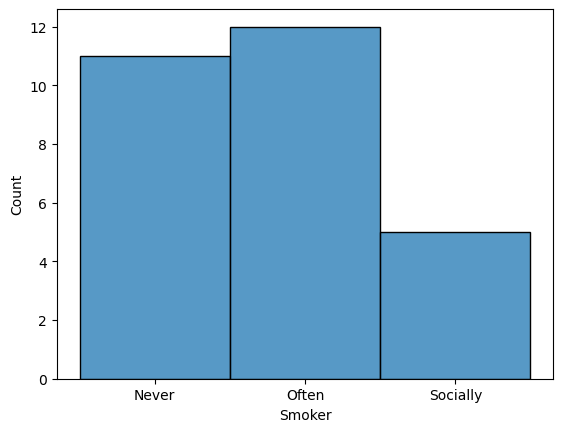

In [38]:
sns.histplot(data=Teen,x='Smoker');

### most teens used to  smoke often

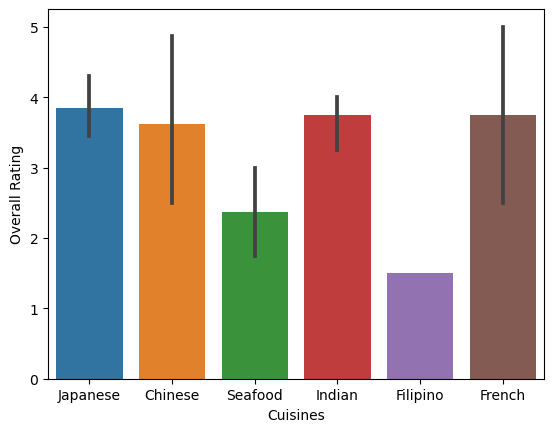

In [39]:
sns.barplot(x='Cuisines',y='Overall Rating', data=Teen)
plt.show()

### teens gave more ratings to Japanese  cusines.

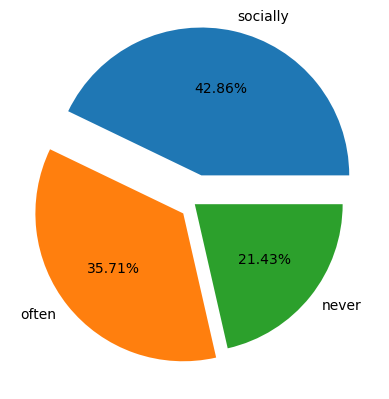

In [40]:
plt.pie(data=Teen,x=Teen.Alcohol.value_counts(),explode=[0.2,0.1,0],labels=['socially','often','never'],autopct='%0.2f%%');

#### in teens most of them are using alcohol in  their social  groups                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


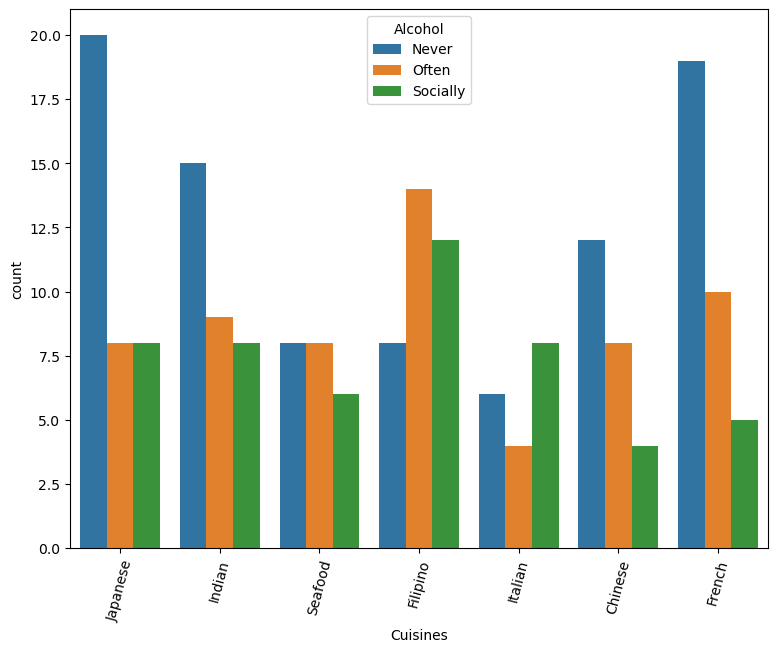

In [41]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=75)
sns.countplot(data=data,x='Cuisines',hue='Alcohol')

plt.show()

#### people who prefer filipino cusines tends to be more alcoholic.

In [42]:
cusine_alcohol=data.query("Cuisines=='Filipino' and Alcohol=='Often'")
cusine_alcohol

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age_group
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19,Middle
14,"Riverdale,NY",Male,Married,Student,3,Filipino,Often,Never,1,1,1.0,No,66,Old
41,"Market City, NY",Female,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No,55,Old
55,"Upper West Side,NY",Female,Single,Professional,4,Filipino,Often,Socially,3,1,2.0,No,31,Middle
79,"China Town, NY",Female,Single,Student,1,Filipino,Often,Socially,1,5,3.0,No,24,Middle
86,"St. George,NY",Male,Married,Professional,4,Filipino,Often,Socially,1,5,3.0,No,61,Old
93,"Riverdale,NY",Female,Married,Student,5,Filipino,Often,Never,1,4,2.5,No,37,Old
107,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,4,2,3.0,Yes,19,Middle
114,"Riverdale,NY",Male,Married,Student,3,Filipino,Often,Never,2,2,2.0,No,66,Old
141,"Market City, NY",Female,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No,55,Old


#### data set of all people who prefer Filipino cusine and  drink alcohol often. 

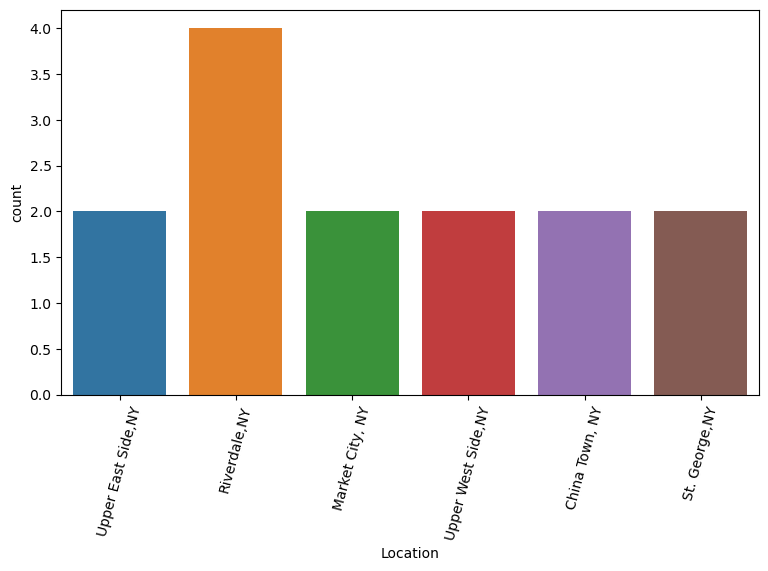

In [43]:
plt.figure(figsize=(9,5))
plt.xticks(rotation=75)
sns.countplot(data=cusine_alcohol,x='Location');

#### from the graph we can say that  people who prefer Filipino cusine and drink alcohol often are mostly in Riverdale

In [44]:
data.head()

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age_group
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16,Teen
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31,Middle
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45,Old
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66,Old
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25,Middle


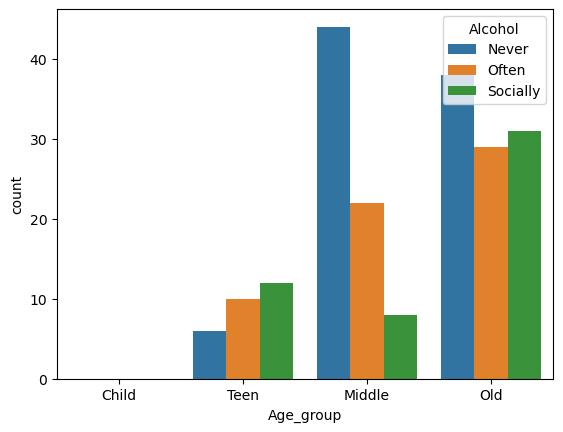

In [45]:
plt.figure()
sns.countplot(data=data,x='Age_group',hue='Alcohol')
plt.show()

### people of age above 35 are more alcoholic

In [46]:
old_alcoholic=data.query("Age_group=='Old'and Alcohol=='Often'")
old_alcoholic

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age_group
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45,Old
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45,Old
13,"Riverdale,NY",Male,Single,Student,5,Italian,Often,Socially,5,2,3.5,No,42,Old
14,"Riverdale,NY",Male,Married,Student,3,Filipino,Often,Never,1,1,1.0,No,66,Old
15,"Upper East Side,NY",Female,Married,Student,3,French,Often,Never,4,1,2.5,No,66,Old
19,"Central Park,NY",Male,Married,Student,4,Seafood,Often,Never,3,1,2.0,No,63,Old
41,"Market City, NY",Female,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No,55,Old
44,"St. George,NY",Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53,Old
46,"Central Park,ny",Male,Single,Professional,3,French,Often,Socially,5,3,4.0,No,46,Old
78,"China Town, NY",Male,Married,Professional,3,Seafood,Often,Often,5,5,5.0,Yes,57,Old


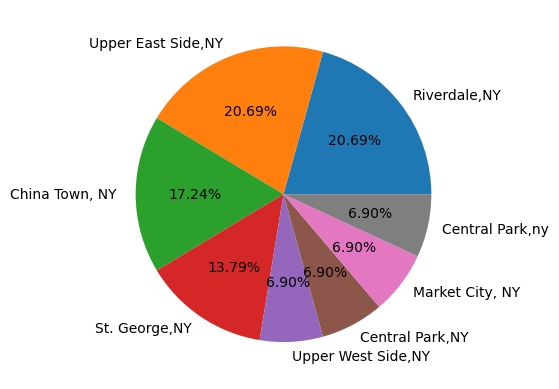

In [47]:
plt.pie(data=old_alcoholic,x=old_alcoholic.Location.value_counts(),explode=[0,0,0,0,0,0,0,0],labels=['Riverdale,NY','Upper East Side,NY','China Town, NY ','St. George,NY','Upper West Side,NY','Central Park,NY','Market City, NY','Central Park,ny'],autopct='%0.2f%%');

### in the data set people of age above 35 and alcoholic are mostly located at Riverdale and Upper East Side